# Risk calibration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from pprint import pprint
from util import xgb_helper

# Load data

In [2]:
f = open('data/LC_model_input.pckl', 'rb')
data = pickle.load(f)
f.close()

xtrain = data['xtrain']
ytrain = data['ytrain']
xtest = data['xtest']
ytest = data['ytest']
xeval = data['xeval']
yeval = data['yeval']
features = data['features']

# Load Model

In [3]:
model = xgb_helper.XGBModel()
model.load_model()

* We calibrate credit score by using a polynomial fit on model output with the log(odd)
* odd = $P_g / P_b$

### We use a polynomial regression to fit the bad prob and odd

* Polynomial fit:  $y = \sum_d a_dx^d$
* $x = 100-100*P_b$
* $y = \log(P_g/P_b)$

In [4]:
xeval

array([[0.0000e+00, 3.0000e+00, 1.5000e+04, ..., 3.0000e+00, 1.3765e+04,
        0.0000e+00],
       [1.0000e+01, 9.0000e+00, 3.0000e+04, ..., 9.0000e+00, 1.6000e+01,
        0.0000e+00],
       [3.0000e+00, 3.0000e+00, 1.2000e+04, ..., 3.0000e+00, 2.5462e+04,
        0.0000e+00],
       ...,
       [1.0000e+01, 2.0000e+00, 2.1000e+04, ..., 2.0000e+00, 2.6400e+03,
        0.0000e+00],
       [3.0000e+00, 3.0000e+00, 1.6000e+04, ..., 3.0000e+00, 3.1716e+04,
        1.0000e+00],
       [1.0000e+01, 6.0000e+00, 1.8000e+04, ..., 6.0000e+00, 4.0180e+03,
        0.0000e+00]])

In [5]:
yeval

array([1., 0., 0., ..., 1., 0., 0.])

In [6]:
features

['emp_length',
 'num_rev_tl_bal_gt_0',
 'loan_amnt',
 'tot_cur_bal',
 'total_rec_int',
 'mort_acc',
 'funded_amnt_inv',
 'avg_cur_bal',
 'installment',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'pymnt_plan',
 'num_actv_bc_tl',
 'annual_inc',
 'funded_amnt',
 'home_ownership',
 'num_actv_rev_tl',
 'bc_open_to_buy',
 'inq_last_6mths']

R Squre: 0.9106700537253613


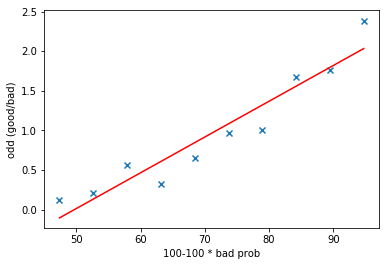

In [7]:
coef, r2 = model.risk_calibration(xeval, yeval, features, degree=1, is_plot=True)
print('R Squre:', r2)

R Squre: 0.9676372802467774


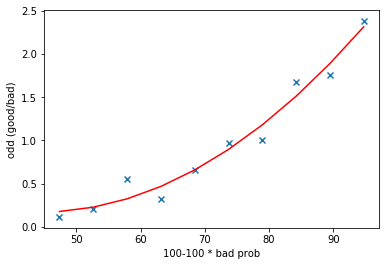

In [8]:
coef, r2 = model.risk_calibration(xeval, yeval, features, degree=2, is_plot=True)
print('R Squre:', r2)

R Squre: 0.9694477036280613


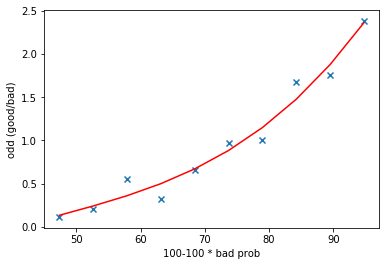

In [9]:
coef, r2 = model.risk_calibration(xeval, yeval, features, degree=3, is_plot=True)
print('R Squre:', r2)

R Squre: 0.970188866997676


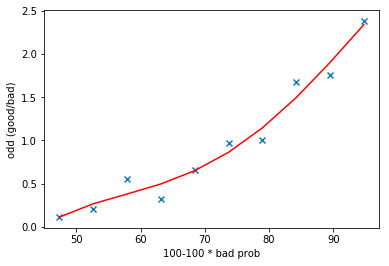

In [10]:
coef, r2 = model.risk_calibration(xeval, yeval, features, degree=4, is_plot=True)
print('R Squre:', r2)

R Squre: 0.9715970347821892


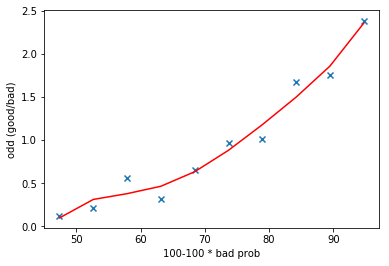

In [11]:
coef, r2 = model.risk_calibration(xeval, yeval, features, degree=5, is_plot=True)
print('R Squre:', r2)

## Use polynomial regression with degree=4 to calibrate credit score

* We use the following formula to calibrate the score:
* $score = A + Bf(x) = 400+ (60/\log(2))*(a_0+a_1x_1+a_2x^2+a_3x^3+a_4x^4)$

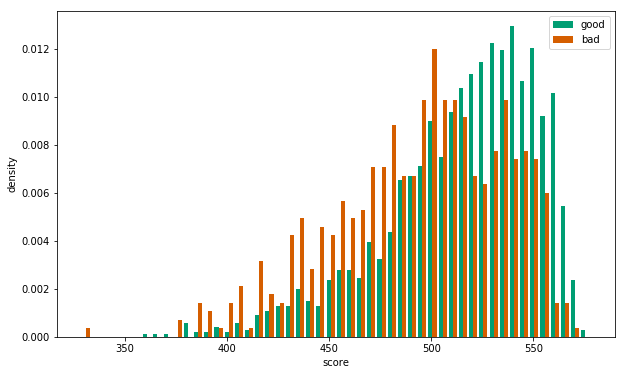

In [12]:
coef, r2 = model.risk_calibration(xeval, yeval, features, degree=1)
plt.figure(figsize=(10, 6))
model.eval_score(xeval, yeval, features, coef)